In [11]:
import numpy as np
from numpy import genfromtxt
A = genfromtxt('hw_2_A.csv', delimiter=',')
B = genfromtxt('hw_2_B.csv', delimiter=',')
C = genfromtxt('hw_2_C.csv', delimiter=',')
D = genfromtxt('hw_2_D.csv', delimiter=',')
E = genfromtxt('hw_2_E.csv', delimiter=',')
x = np.reshape(genfromtxt('hw_2_x.csv', delimiter=','),  (-1,1))
y = np.reshape(genfromtxt('hw_2_y.csv', delimiter=','),  (-1,1))
z = np.reshape(genfromtxt('hw_2_z.csv', delimiter=','),  (-1,1))

# max(⟨A, A⟩)
print ("1) ", np.max(np.trace(A.dot(A.T))), "\n")

# max(⟨A, B⟩)
print ("2) ", np.min(np.trace(A.dot(B.T))), "\n")

# sum(⟨C, D⟩)
print ("3) ", np.sum(np.trace(C.dot(D.T))), "\n")

# average((C+D)x)
print ("4) ", np.average((C+D).dot(x)), "\n")

# max(⟨C⊤, D⊤⟩x)
print ("5) ", np.max(np.trace((C.T).dot(D.T.T))*(x)) , "\n")

# min(x ⊗ z)
print ("6) ", np.min(x.dot(z.T)), "\n")

# (x ⊗ z)
print ("7) \n", x.dot(z.T), "\n")

# sum(A + B − 10)
print ("8) ", np.sum(A+B-10), "\n")

# average(A⊤B)
print ("9) ", np.average(A.T.dot(B)) , "\n")

# E⊤C⊤Dx
print ("10) \n", E.T.dot(C.T).dot(D).dot(x), "\n")



1)  292.05000000000007 

2)  10.449999999999996 

3)  -3.49 

4)  -0.4699999999999998 

5)  0.3489999999999999 

6)  -3.7199999999999998 

7) 
 [[-3.72  0.12  0.24]
 [-1.86  0.06  0.12]
 [ 0.    0.    0.  ]
 [ 0.31 -0.01 -0.02]
 [-3.72  0.12  0.24]] 

8)  -2987.2000000000003 

9)  -2.774444444444445 

10) 
 [[ 8.8684]
 [-4.502 ]
 [-3.0041]
 [-5.5886]] 



linear feature map: 
 [[10.976  1.   ]
 [14.304  1.   ]
 [12.055  1.   ]
 ...
 [18.768  1.   ]
 [ 4.573  1.   ]
 [13.543  1.   ]]
best w: 
 [0.41159209 0.15089271]


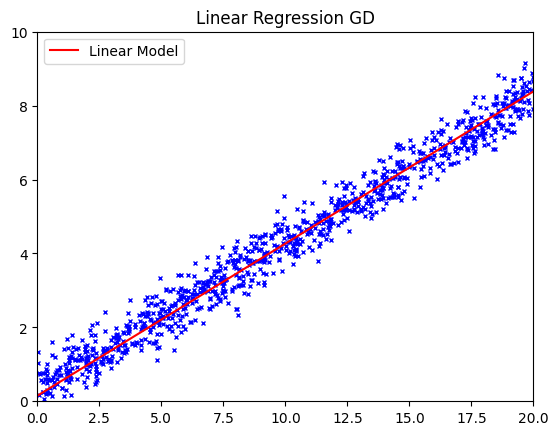

In [37]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
# Load data
x_lin = np.genfromtxt('time_with_loved_ones.csv', delimiter='\n')
y_lin = genfromtxt('happiness_level.csv', delimiter='\n')

def feature_map_linear(x):
    # phi_i = x, 1 -> we have a slope (m) and a constant (b)
    ones_col = np.ones_like(x)  
    X_map = np.vstack([x, ones_col]).T
    return X_map

def gradient_descent(X, y, learning_rate=0.1, iters=1000):
    # X is the feature map, y is our target labels
    m, n = X.shape
    w = np.zeros(n)  # n weights
    for i in range(iters):
        y_pred = X.dot(w)
        gradient = X.T.dot(y_pred - y) / m  # find gradient
        w -= learning_rate * gradient  # update weights
    return w

X_lin = feature_map_linear(x_lin)
print(f"linear feature map: \n {X_lin}")
w_lin = gradient_descent(X_lin, y_lin, learning_rate=0.001, iters=2000)
print(f"best w: \n {w_lin}")

x = np.linspace(0, 20, 1000)
y = x * w_lin[0] + w_lin[1]
plt.axis([0.0, 20.0, 0.0, 10])
plt.plot(x_lin, y_lin, marker='x', linestyle='None', color='blue', markersize=3)
plt.plot(x, y, label='Linear Model', color='red')
plt.title("Linear Regression GD")
plt.legend()
plt.show()